# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [229]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [230]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [231]:
from citipy import citipy
from api_keys import weather_api_key
import time

RECORD_LIMIT = 50 # number of records
TIME_LIMIT = 60 #in seconds

# For debug limit number of cities to the first 5
# RECORD_LIMIT = 5 # number of records
# TIME_LIMIT = 6 #in seconds
# cities = cities[:10]

url = "http://api.openweathermap.org/data/2.5/weather?"
params = {
    'appid': weather_api_key,
    'q': '',
    'units': 'imperial'
}
city_json_data = {}


record_count = 1
set_count = 1
for city in cities:
    
    params['q'] = city
    response = requests.get(url, params=params)

    if (response.status_code == 200):
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
        city_json_data[city] = response.json()

        # Free API limits us to 60 calls per minute
        # Use 50 here to avoid running into any issue
        # More info here: 
        # https://home.openweathermap.org/subscriptions
        if record_count == RECORD_LIMIT:
            record_count = 0
            set_count +=1
            time.sleep(TIME_LIMIT)

        record_count += 1
        
    else:
        print(f"City '{city}' not found. Skipping...")

# print(city_json_data) 

Processing Record 1 of Set 1 | lorengau
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | nanortalik
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | kubanskiy
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | muros
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | virginia beach
Processing Record 12 of Set 1 | tuatapere
Processing Record 13 of Set 1 | sitka
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | caravelas
Processing Record 17 of Set 1 | newport
Processing Record 18 of Set 1 | yulara
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | russell
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | mahebourg
City 'taolanaro' not found. Skipping...
Processing Record 23 of Set 1 | cape town
Processing Record 24

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [233]:
import json

# Specify empty column types 
# https://stackoverflow.com/questions/36462257/create-empty-dataframe-in-pandas-specifying-column-types
schema = { 
    'City': str,
    'Lat': float,
    'Lng': float,
    'Max Temp': float,
    'Humidity': int,
    'Cloudiness': int,
    'Wind Speed': float,
    'Country': str,
    'Date': int}
df = pd.DataFrame(columns=schema.keys()).astype(schema)
df['City'] = city_json_data.keys()

for index, row in df.iterrows():
    city = df.loc[index, 'City']
#     print(json.dumps(city_json_data[city], indent=4, sort_keys=True))

    df.loc[index, "Lat"] = city_json_data[city]['coord']['lat']
    df.loc[index, "Lng"] = city_json_data[city]['coord']['lon']
    df.loc[index, "Max Temp"] = city_json_data[city]['main']['temp_max']
    df.loc[index, "Humidity"] = city_json_data[city]['main']['humidity']
    df.loc[index, "Cloudiness"] = city_json_data[city]['clouds']['all']
    df.loc[index, "Wind Speed"] = city_json_data[city]['wind']['speed']
    df.loc[index, "Country"] = city_json_data[city]['sys']['country']
    df.loc[index, "Date"] = city_json_data[city]['dt']
        
df.to_csv(output_data_file, encoding="utf-8", index=False)
df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lorengau,-2.0226,147.2712,83.32,79.0,18.0,11.16,PG,1.628224e+09
1,rikitea,-23.1203,-134.9692,74.16,75.0,10.0,14.50,PF,1.628224e+09
2,nanortalik,60.1432,-45.2371,45.88,96.0,100.0,2.06,GL,1.628224e+09
3,hithadhoo,-0.6000,73.0833,82.87,69.0,97.0,7.58,MV,1.628223e+09
4,avarua,-21.2078,-159.7750,77.05,57.0,75.0,2.30,CK,1.628223e+09
...,...,...,...,...,...,...,...,...,...
538,ambulu,-8.3450,113.6058,87.33,61.0,96.0,8.52,ID,1.628225e+09
539,marshall,34.3834,-86.3333,76.08,79.0,1.0,0.00,US,1.628225e+09
540,rey bouba,8.6724,14.1786,71.58,96.0,73.0,1.63,CM,1.628225e+09
541,esfahan,32.6572,51.6776,80.24,21.0,97.0,3.62,IR,1.628225e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [234]:
#  Get the indices of cities that have humidity over 100%.
# df.loc[df['Humidity'] > 100]
humid_city_indeces = df.index[df['Humidity'] >100]
humid_city_indeces

Int64Index([], dtype='int64')

In [235]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = df.drop(index=humid_city_indeces, inplace=False)
clean_city_data.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lorengau,-2.0226,147.2712,83.32,79.0,18.0,11.16,PG,1.628224e+09
1,rikitea,-23.1203,-134.9692,74.16,75.0,10.0,14.50,PF,1.628224e+09
2,nanortalik,60.1432,-45.2371,45.88,96.0,100.0,2.06,GL,1.628224e+09
3,hithadhoo,-0.6000,73.0833,82.87,69.0,97.0,7.58,MV,1.628223e+09
4,avarua,-21.2078,-159.7750,77.05,57.0,75.0,2.30,CK,1.628223e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

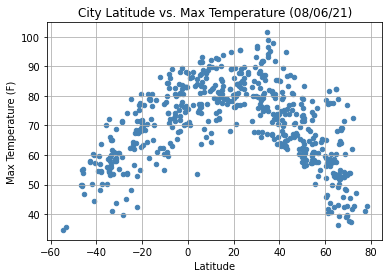

In [238]:
import matplotlib.pyplot as plt

#Data should all be from the same day so use first index for title
city_data_date = pd.to_datetime(df['Date'], unit='s')[0].strftime("%m/%d/%y")
clean_city_data.plot('Lat',
                     'Max Temp',
                     kind="scatter",
                     legend= False,
                     xlabel ="Latitude",
                     ylabel ="Max Temperature (F)",
                     title = f'City Latitude vs. Max Temperature ({city_data_date})',
                     grid=True,
                    color='steelblue',
                    marker='o')

plt.savefig('images/CityLatitudeVsMaxTemperature.png')

## Latitude vs. Humidity Plot

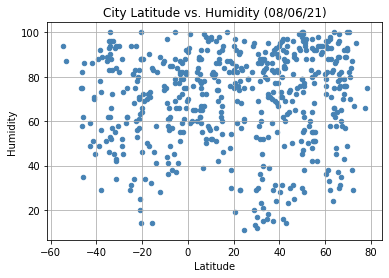

In [239]:
clean_city_data.plot('Lat',
                     'Humidity',
                     kind="scatter",
                     legend= False,
                     xlabel ="Latitude",
                     ylabel ="Humidity",
                     title = f'City Latitude vs. Humidity ({city_data_date})',
                     color='steelblue',
                     grid=True)
plt.savefig('images/CityLatitudeVsHumidity.png')

## Latitude vs. Cloudiness Plot

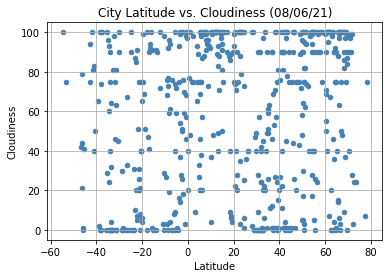

In [240]:
clean_city_data.plot('Lat',
                     'Cloudiness',
                     kind="scatter",
                     legend= False,
                     xlabel ="Latitude",
                     ylabel ="Cloudiness",
                     title = f'City Latitude vs. Cloudiness ({city_data_date})',
                     color='steelblue',
                     grid=True)
plt.savefig('images/CityLatitudeVsCloudiness.png')

## Latitude vs. Wind Speed Plot

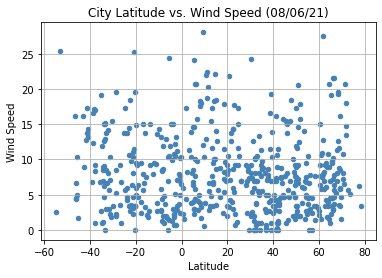

In [241]:
clean_city_data.plot('Lat',
                     'Wind Speed',
                     kind="scatter",
                     legend= False,
                     xlabel ="Latitude",
                     ylabel ="Wind Speed",
                     title = f'City Latitude vs. Wind Speed ({city_data_date})',
                     color='steelblue',
                     grid=True)
plt.savefig('images/CityLatitudeVsWindSpeed.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6976063388389336


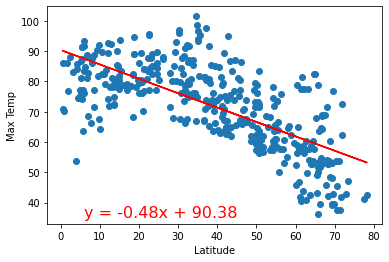

In [253]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

northern_lat_df = clean_city_data.loc[clean_city_data['Lat'] > 0]
x_values = northern_lat_df['Lat']
y_values = northern_lat_df['Max Temp']
# print(x_values)
# print(y_values)

# Calculate line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)
print(f"The r-value is: {rvalue}")

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6, 35),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig('images/MaxTempVsLatitude-NorthernHemisphereLinearRegression.png')
plt.show()


##### Max Temp Vs Latitude Northern Hemisphere Regression Analysis
In general, the maximum temperature drops the higher the lattitude in the northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7590467685068935


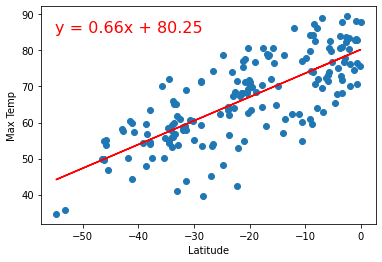

In [254]:
from scipy.stats import linregress

southern_lat_df = clean_city_data.loc[clean_city_data['Lat'] < 0]
x_values = southern_lat_df['Lat']
y_values = southern_lat_df['Max Temp']
# print(x_values)
# print(y_values)

# Calculate line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)
print(f"The r-value is: {rvalue}")

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 85),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig('images/MaxTempVsLatitude-SouthernHemisphereLinearRegression.png')
plt.show()


##### Max Temp Vs Latitude Southern Hemisphere Regression Analysis
In general, the maximum temperature drops the lower the lattitude in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.02612688255168509


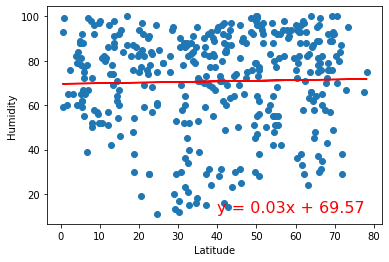

In [255]:
from scipy.stats import linregress

southern_lat_df = clean_city_data.loc[clean_city_data['Lat'] > 0]
x_values = northern_lat_df['Lat']
y_values = northern_lat_df['Humidity']
# print(x_values)
# print(y_values)

# Calculate line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)
print(f"The r-value is: {rvalue}")

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40, 12),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('images/HumidityVsLatitude-NorthernHemisphereLinearRegression.png')
plt.show()


##### Humidity Vs Latitude Northern Hemisphere Regression Analysis
The humidity does not seem correlated with the latitude in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.01785421912197786


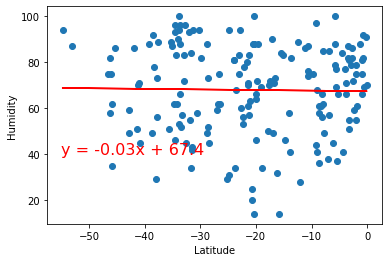

In [256]:
from scipy.stats import linregress

southern_lat_df = clean_city_data.loc[clean_city_data['Lat'] < 0]
x_values = southern_lat_df['Lat']
y_values = southern_lat_df['Humidity']
# print(x_values)
# print(y_values)

# Calculate line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)
print(f"The r-value is: {rvalue}")

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 40),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('images/HumidityVsLatitude-SouthernHemisphereLinearRegression.png')
plt.show()


##### Humidity Vs Latitude Southern Hemisphere Regression Analysis
The humidity does not seem correlated with the latitude in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.0411940566392487


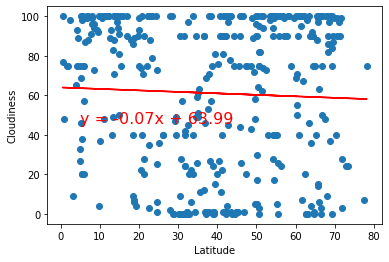

In [257]:
from scipy.stats import linregress

southern_lat_df = clean_city_data.loc[clean_city_data['Lat'] > 0]
x_values = northern_lat_df['Lat']
y_values = northern_lat_df['Cloudiness']
# print(x_values)
# print(y_values)

# Calculate line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)
print(f"The r-value is: {rvalue}")

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5, 46),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('images/CloudinessVsLatitude-NorthernHemisphereLinearRegression.png')
plt.show()


##### Cloudiness Vs Latitude Northern Hemisphere Regression Analysis
Cloudiness does not seem correlated with the latitude in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0364189211854312


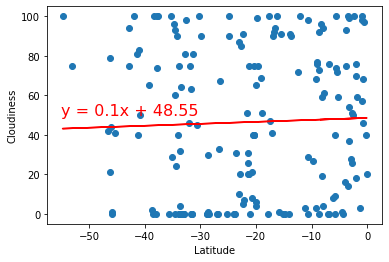

In [258]:
from scipy.stats import linregress

southern_lat_df = clean_city_data.loc[clean_city_data['Lat'] < 0]
x_values = southern_lat_df['Lat']
y_values = southern_lat_df['Cloudiness']
# print(x_values)
# print(y_values)

# Calculate line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)
print(f"The r-value is: {rvalue}")

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 50),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('images/CloudinessVsLatitude-SouthernHemisphereLinearRegression.png')
plt.show()


##### Cloudiness Vs Latitude Southern Hemisphere Regression Analysis
Cloudiness does not seem correlated with the latitude in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.10747976208096979


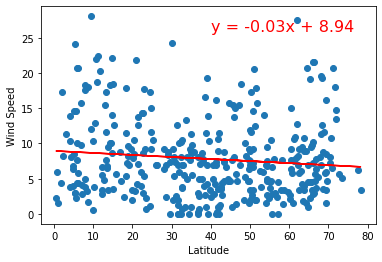

In [259]:
from scipy.stats import linregress

southern_lat_df = clean_city_data.loc[clean_city_data['Lat'] > 0]
x_values = northern_lat_df['Lat']
y_values = northern_lat_df['Wind Speed']
# print(x_values)
# print(y_values)

# Calculate line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)
print(f"The r-value is: {rvalue}")

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40, 26),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('images/WindSpeedVsLatitude-NorthernHemisphereLinearRegression.png')
plt.show()


##### Wind Speed Vs Latitude Northern Hemisphere Regression Analysis
Wind speed does not seem correlated with the latitude in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.19768877778258248


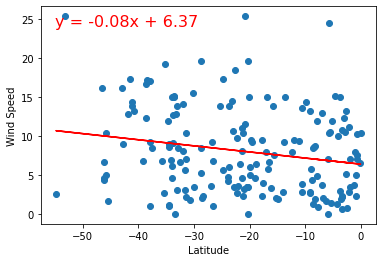

In [261]:
from scipy.stats import linregress

southern_lat_df = clean_city_data.loc[clean_city_data['Lat'] < 0]
x_values = southern_lat_df['Lat']
y_values = southern_lat_df['Wind Speed']
# print(x_values)
# print(y_values)

# Calculate line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)
print(f"The r-value is: {rvalue}")

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 24),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('images/WindSpeedVsLatitude-SouthernHemisphereLinearRegression.png')
plt.show()


##### Wind Speed Vs Latitude Southern Hemisphere Regression Analysis
Wind speed does seem a bit more correlated with the lattude here. Given the northern hemisphere data, it would be worth looking into whether this was related to the day the data was gathered or if there truly is a relation. Also, the southern hemisphere is currently experiencing winter so perhaps there are other factors that contribue to the wind speeds.

## Trends

* The max temperature overall seems to drop the further you are from the equator. This is as expected.
* Humidity does not seem to obey any rules with regard to lattitude.  
* Cloudiness does not seem to obey any rules with regard to lattitude.  
* Wind speed does not seem to obey any rules with regard to lattitude in the northern hemisphere. Wind speeds increase the lower the latitude in the southern hemisphere. More data would be useful for further analyzing the southern hemisphere.  
